In [22]:
from thinkbayes import Suite
import thinkbayes

In [8]:
class Euro(Suite):
    def __init__(self, prob_wrong_observation, hypos):
        self.wrong_obs = prob_wrong_observation
        self.right_obs = 1 - prob_wrong_observation
        super().__init__(hypos)
    
    def Likelihood(self, data, hypo):
        p_H = hypo / 100
        p_T = 1 - p_H
        if data == 'H':
            true_positive = p_H * self.right_obs
            false_negative = p_T * self.wrong_obs
        else:
            true_positive = p_T * self.right_obs
            false_negative = p_H * self.wrong_obs
        return true_positive + false_negative

In [11]:
import matplotlib.pyplot as plt
def plot_distro(suite):
    hs, ps = [], []
    for hypo, prob in sorted(suite.Items()):
        hs.append(hypo)
        ps.append(prob)
    plt.plot(hs, ps)
    plt.xlabel('x')
    plt.ylabel('Probability');

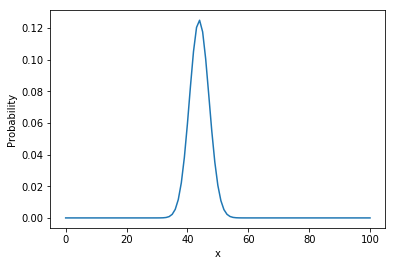

In [20]:
suite = Euro(0.99, range(0, 101))
dataset = 'H' * 140 + 'T' * 110

for data in dataset:
    suite.Update(data)
    
plot_distro(suite)

In [29]:
def summarize(y, hypos, dataset):
    suite = Euro(y, hypos)
    for data in dataset:
        suite.Update(data)
    print('y={}, maxLH={}, mean={}, median={}, credInt={}'.format(
            y,
            suite.MaximumLikelihood(),
            suite.Mean(),
            thinkbayes.Percentile(suite, 50),
            thinkbayes.CredibleInterval(suite, 90)
        ))

In [32]:
hypos = range(0, 101)
dataset = 'H' * 140 + 'T' * 110

for y in range(0, 100, 5):
    summarize(y/100.0, hypos, dataset)

y=0.0, maxLH=56, mean=55.952380952380956, median=56, credInt=(51, 61)
y=0.05, maxLH=57, mean=56.61375661375662, median=57, credInt=(51, 62)
y=0.1, maxLH=57, mean=57.44047619047622, median=57, credInt=(51, 64)
y=0.15, maxLH=59, mean=58.50340136054427, median=59, credInt=(51, 66)
y=0.2, maxLH=60, mean=59.92063492063489, median=60, credInt=(51, 68)
y=0.25, maxLH=62, mean=61.904761904232906, median=62, credInt=(52, 72)
y=0.3, maxLH=65, mean=64.88091776838881, median=65, credInt=(52, 78)
y=0.35, maxLH=70, mean=69.79698734103977, median=70, credInt=(53, 87)
y=0.4, maxLH=80, mean=76.9583005468415, median=78, credInt=(53, 97)
y=0.45, maxLH=100, mean=78.50184796897165, median=82, credInt=(45, 99)
y=0.5, maxLH=100, mean=49.9999999999999, median=50, credInt=(5, 95)
y=0.55, maxLH=0, mean=21.49815203102834, median=18, credInt=(1, 55)
y=0.6, maxLH=20, mean=23.04169945315853, median=22, credInt=(3, 47)
y=0.65, maxLH=30, mean=30.20301265896019, median=30, credInt=(13, 47)
y=0.7, maxLH=35, mean=35.1190